딥러닝은 2000년대부터 사용되고 있는 심층 신경망의 또다른 이름이다.  
신결망은 인공 신경망이라고도 불린다.  
이는 사람의 뇌 신경 세포에서 일어나는 반응을 모델링하여 만들어진 고전적인 머신 러닝 알고리즘이다.  
딥러닝이란 신경망을 여러 계층(layer)으로 쌓아서 만든 머신 러닝 알고리즘 일종이다.  
컴퓨터 비전 분야에서 딥러닝 기술이 크게 주목받고 있는 이유는 객체인식, 얼굴 인식, 객체 검출, 분할 등의 다양한 영역에서 딥러닝이 적용된 기술이 기존의 컴퓨터 비전 기반 기술보다 월등한 성능을 보여주고 있기 때문이다. 

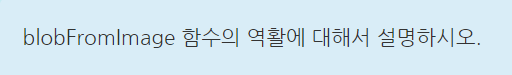!
이미지로부터 4차원 형태의 행렬을 리턴해주는 역할을 한다.
N, C, H, W 값을 리턴하며 각각은 다음과 같다.

N : 사진 갯수

C : 채널 갯수이며 gratscale의 경우 2이다.

H : 높이

W : 너비



여기서 blobFromImage 각 파라미터는 다음과 같다.

Image : 입력영상

Scalefactor : 입력 영상 픽셀 값에 곱할 값. 기본값은 1

size : 출력 영상의 크기. 

mean : 입력 영상 각 채널에서 뺄 평균 값. 기본값은 (0, 0, 0, 0)이다.

swapRB : R과 B채널을 서로 바꿀 것인지를 결정하는 플래그이다. 기본값은 False이다.

crop : 크롭(crop) 수행여부이다. 기본값은 False이다.

ddepth : 출력 블롭의 깊이로 CV_32F 또는 CV_8U 기본값은 CV_32F이다.
[image-2.png](attachment:image-2.png)
카메라 또는 동영상에서 얼굴 검출 후에 학습된 얼굴 인식 모델을 이용하여 얼굴을 인식한다.

NCHW정보를 제공한다.  데이터개수, 채널수, 영상의 높이, 폭으로 4차원으로 표현해 준다. 
image : 입력영상, 1또는 3채널을 많이 사용한다.  
scalefactor : 입력 영상 픽셀 값에 곱할 값 0~1, 0~255를 만들기 위해 곱한다. 
size : 출력영상의 크기
mean : 입력영상 각 채널에서 뺄 평균값. 만약 image가 BGR 채널 순서이고 swapRB가 true이면 (R평균, G평균, B평균) 순서로 값을 지정합니다. 
swapRB : 첫번째 채널과 세 번째 채널을 서로 바꿀 것인지를 결정하는 플래그. 이 값이 true이면 컬러 입력 영상의 채널 순서를 BGR에서 RGB로 변경
crop : 입력 영상의 크기를 변경한 후 , 크롬(crop)을 수행할 것인지를 결정하는 플래그  
ddepth : 출력 블롭의 깊이. CV_32F 또는 CV_8U를 지정합니다.  
반환값 : 영상으로부터 구한 블롭 객체. 4차원(NCHW) Mat 행렬이다.

In [1]:
import sys
import numpy as np
import cv2
import io
import matplotlib.pylab as plt
!pip install opencv-python
def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")   

# 1. 숫자인식

In [2]:
oldx, oldy = -1, -1

def on_mouse(event, x, y, flags, _):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        oldx, oldy = -1, -1

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (255, 255, 255), 40, cv2.LINE_AA)
            oldx, oldy = x, y
            cv2.imshow('img', img)


net = cv2.dnn.readNet('mnist_cnn.pb')

if net.empty():
    print('Network load failed!')
    sys.exit()

img = np.zeros((400, 400), np.uint8)

cv2.imshow('img', img)
cv2.setMouseCallback('img', on_mouse)

while True:
    c = cv2.waitKey()

    if c == 27:
        break
    elif c == ord(' '):
        blob = cv2.dnn.blobFromImage(img, 1/255., (28, 28))
        net.setInput(blob)
        prob = net.forward()
        print(prob)

        _, maxVal, _, maxLoc = cv2.minMaxLoc(prob)#확률값과 위치를 리턴한다. 
        print(maxVal, maxLoc)
        digit = maxLoc[0]

        print('%d (%f)' % (digit, maxVal * 100))

        img.fill(0)#인식한 후에는 이미지를 다시 0으로 채운다. 
        cv2.imshow('img', img)

cv2.destroyAllWindows()

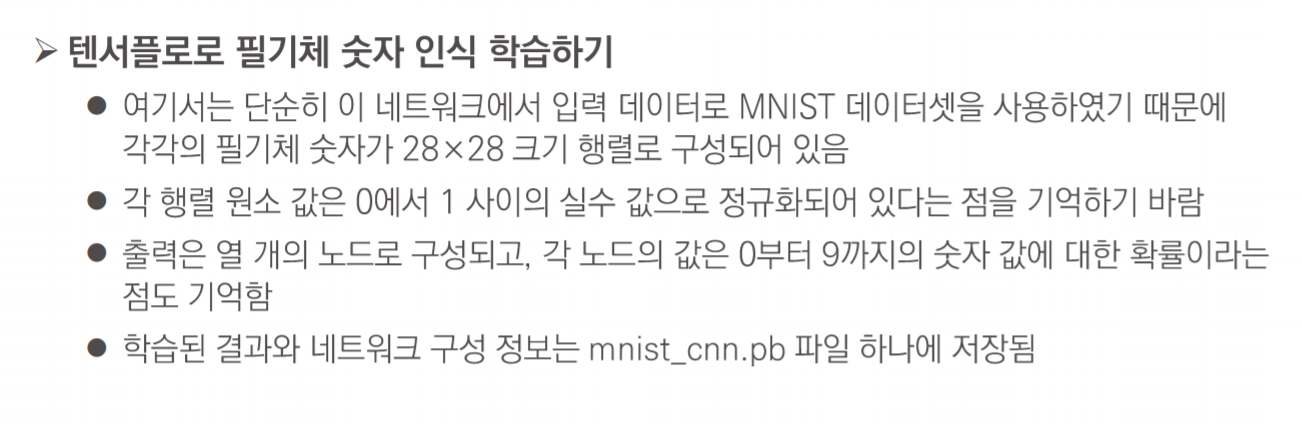

# 2. 한글인식

In [3]:
labels_file = io.open("label.txt", 'r', encoding='utf-8').read().splitlines()
#한글파일 980개
print(labels_file[1])

각


In [ ]:
oldx, oldy = -1, -1

def on_mouse(event, x, y, flags, _):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        oldx, oldy = -1, -1

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (0, 0, 0), 40, cv2.LINE_AA)
            oldx, oldy = x, y
            cv2.imshow('img', img)


net = cv2.dnn.readNet('frozen_graph.pb')


if net.empty():
    print('Network load failed!')
    sys.exit()

img = np.ones((400, 400), np.uint8) * 255

cv2.imshow('img', img)
cv2.setMouseCallback('img', on_mouse)

while True:
    c = cv2.waitKey()

    if c == 27:
        break
    elif c == ord(' '):
        blob = cv2.dnn.blobFromImage(img, 1/255., (32, 32))
        net.setInput(blob)
        prob = net.forward()
        print(prob.shape)
        #_, maxVal, _, maxLoc = cv2.minMaxLoc(prob)
        digit = np.argmax(prob)#인덱스 값을 가져온다. 가장 최대값의 인덱스를 가져옵니다. 
        print(digit)
        
        
        print(labels_file[digit], np.max(prob) * 100)

        img.fill(255)
        cv2.imshow('img', img)

cv2.destroyAllWindows()

(1, 980)
917
하 88.62995505332947


# 3. 영상인식

In [5]:
# http://dl.caffe.berkeleyvision.org/bvlc_googlenet.caffemodel


filename = 'scooter.jpg'
filename = 'cup.jpg'
filename = 'beagle.jpg'
filename = 'pineapple.jpg'
filename = 'space_shuttle.jpg'

img = cv2.imread(filename)

if img is None:
    print('Image load failed!')
    sys.exit()

# Load network

net = cv2.dnn.readNet('bvlc_googlenet.caffemodel', 'deploy_c.prototxt')

if net.empty():
    print('Network load failed!')
    sys.exit()

# Load class names

classNames = None
with open('classification_classes_ILSVRC2012.txt', 'rt') as f:
    classNames = f.read().rstrip('\n').split('\n')
    
classNames[1]

'goldfish, Carassius auratus'

In [6]:
# Inference

inputBlob = cv2.dnn.blobFromImage(img, 1, (224, 224), (104, 117, 123))
net.setInput(inputBlob, 'data')
prob = net.forward()
#print(len(prob[0]))

In [7]:
# Check results & Display

out = prob.flatten()
#print(out)
classId = np.argmax(out)
confidence = out[classId]

space shuttle (99.99%)


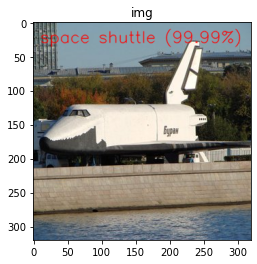

In [8]:
str = '%s (%4.2f%%)' % (classNames[classId], confidence * 100)
cv2.putText(img, str, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 1, cv2.LINE_AA)
print(str)
imshow('img', img)

# 4. 얼굴검출

In [9]:
# https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20180205_fp16/res10_300x300_ssd_iter_140000_fp16.caffemodel
# https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20180220_uint8/opencv_face_detector_uint8.pb


model = 'res10_300x300_ssd_iter_140000_fp16.caffemodel'
config = 'deploy.prototxt'

#odel = 'opencv_face_detector_uint8.pb'
#onfig = 'opencv_face_detector.pbtxt'

net = cv2.dnn.readNet(model, config)

if net.empty():
    print('Net open failed!')
    sys.exit()

frame = cv2.imread('kids.png');

blob = cv2.dnn.blobFromImage(frame, 1, (300, 300), (104, 177, 123))
net.setInput(blob)
detect = net.forward()
print(detect.shape)   

(1, 1, 200, 7)


In [10]:
detect[0,0,0, :]

array([0.        , 1.        , 0.9998331 , 0.71688706, 0.30602056,
       0.8646607 , 0.5671228 ], dtype=float32)

In [11]:
(h, w) = frame.shape[:2]
detect = detect[0, 0, :, :]
print(detect.shape)

(200, 7)


2


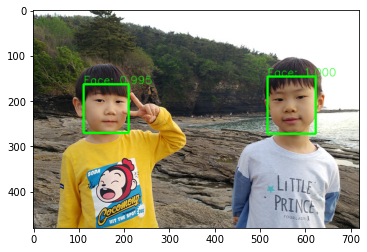

In [12]:
cnt = 0
for i in range(detect.shape[0]):
    confidence = detect[i, 2]
    if confidence < 0.5: continue
    cnt = cnt + 1
    x1 = int(detect[i, 3] * w)
    y1 = int(detect[i, 4] * h)
    x2 = int(detect[i, 5] * w)
    y2 = int(detect[i, 6] * h)

    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 4)

    label = 'Face: %4.3f' % confidence
    cv2.putText(frame, label, (x1, y1 - 1), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 1, cv2.LINE_AA)
print(cnt)

imshow("", frame)

In [13]:
# https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20180205_fp16/res10_300x300_ssd_iter_140000_fp16.caffemodel
# https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20180220_uint8/opencv_face_detector_uint8.pb


model = 'res10_300x300_ssd_iter_140000_fp16.caffemodel'
config = 'deploy.prototxt'

model = 'opencv_face_detector_uint8.pb'
config = 'opencv_face_detector.pbtxt'

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('Camera open failed!')
    sys.exit()

net = cv2.dnn.readNet(model, config)

if net.empty():
    print('Net open failed!')
    sys.exit()

while True:
    _, frame = cap.read()
    if frame is None:
        break        
    
    blob = cv2.dnn.blobFromImage(frame, 1, (300, 300), (104, 177, 123))
    net.setInput(blob)
    detect = net.forward()
    
    (h, w) = frame.shape[:2]
    detect = detect[0, 0, :, :]

    for i in range(detect.shape[0]):
        confidence = detect[i, 2]
        if confidence < 0.5: continue
        cnt = cnt + 1

        x1 = int(detect[i, 3] * w)
        y1 = int(detect[i, 4] * h)
        x2 = int(detect[i, 5] * w)
        y2 = int(detect[i, 6] * h)

        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0))

        label = 'Face: %4.3f' % confidence
        cv2.putText(frame, label, (x1, y1 - 1), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 1, cv2.LINE_AA)
    cv2.imshow('frame', frame)

    if cv2.waitKey(1) == 27:
        break
cv2.destroyAllWindows()

# 5. 객체 검출

In [14]:
classNames = { 0: 'background',
    1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat',
    5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 9: 'chair',
    10: 'cow', 11: 'diningtable', 12: 'dog', 13: 'horse',
    14: 'motorbike', 15: 'person', 16: 'pottedplant',
    17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor' }

weight = 'MobileNetSSD_deploy.caffemodel'
config = 'MobileNetSSD_deploy.prototxt'

net = cv2.dnn.readNetFromCaffe(config, weight)

In [15]:
frame = cv2.imread('img.jpeg');

blob = cv2.dnn.blobFromImage(frame, 0.007843, (300, 300), (127.5, 127.5, 127.5), False)
net.setInput(blob)

detections = net.forward()


detect = detections[0,0,:,:]

print(detections.shape)

(1, 1, 100, 7)


person 84.37252044677734
person 76.61179900169373
person 61.06683015823364
person 58.49577188491821
person 57.260000705718994
person 52.282387018203735
tvmonitor 39.787837862968445
person 26.6811341047287
person 25.225183367729187


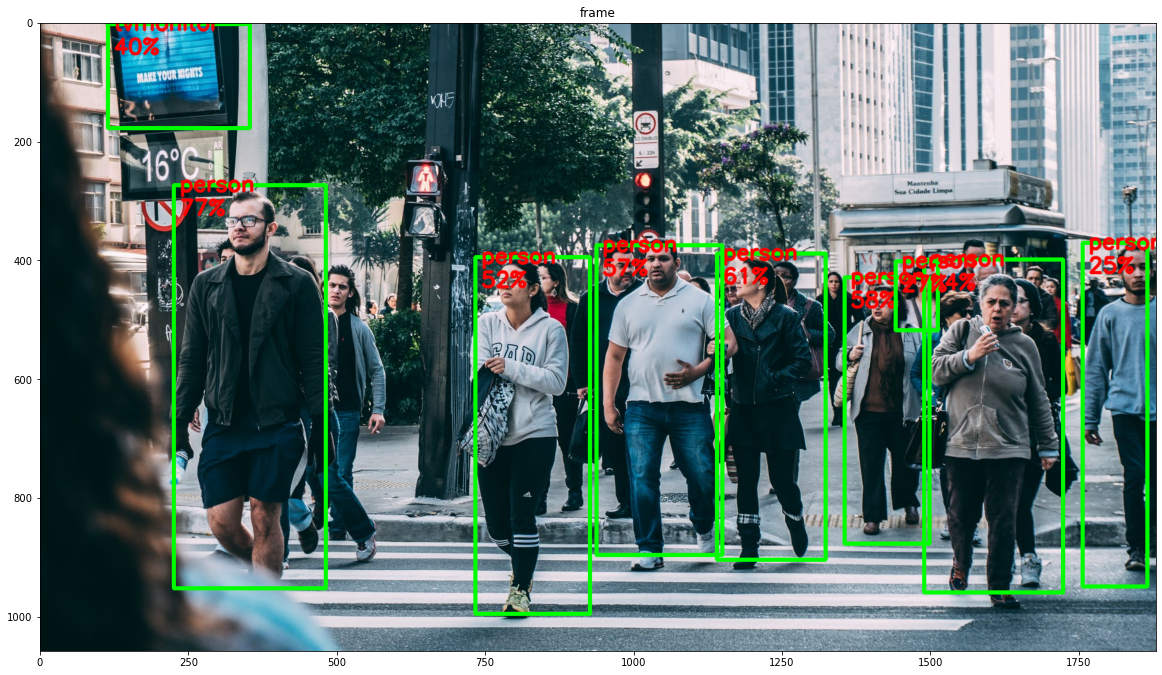

In [16]:
(h, w) = frame.shape[:2]


for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]*100 #Confidence of prediction 
        if confidence > 10: # Filter prediction 
            class_id = int(detections[0, 0, i, 1]) # Class label
            
            x1 = int(detect[i, 3] * w)
            y1 = int(detect[i, 4] * h)
            x2 = int(detect[i, 5] * w)
            y2 = int(detect[i, 6] * h)

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 5)
            label = classNames[class_id] #+ ": " + str(confidence)
            cv2.putText(frame, label, (x1+10, y1+10 ), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255), 3, cv2.LINE_AA)
            cv2.putText(frame, '%2.0f%%' % confidence, (x1+10, y1+50 ), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255), 3, cv2.LINE_AA)
            
            print(label, confidence)
        
        

plt.figure(figsize=(20,15))
imshow("frame", frame)